# **Baca Dataset 👁️**

In [15]:
import pandas as pd

# Coba baca file CSV dengan encoding 'utf-8' dan delimiter koma
try:
    # data = pd.read_csv("dataset_kripto_crosssheck_gabut.csv", encoding='utf-8')
    data = pd.read_csv("dataset_kripto_crosssheck.csv", encoding='utf-8')
    # data = pd.read_csv("dataset_skripsi.csv", encoding='utf-8', delimiter=';')

    print("File CSV berhasil dibaca dengan encoding 'utf-8'.")
except UnicodeDecodeError:
    print("Gagal membaca dengan encoding 'utf-8'. Mencoba encoding lain...")

    # Coba baca file dengan encoding alternatif 'ISO-8859-1'
    try:
        data = pd.read_csv("dataset_kripto_label.csv", encoding='ISO-8859-1')
        print("File CSV berhasil dibaca dengan encoding 'ISO-8859-1'.")
    except UnicodeDecodeError:
        print("Gagal membaca dengan encoding 'ISO-8859-1'. Mengabaikan karakter yang tidak bisa dibaca...")
        
        # Abaikan karakter yang tidak bisa dibaca
        data = pd.read_csv("dataset_kripto_label.csv", encoding='utf-8', errors='ignore')
        print("File CSV berhasil dibaca dengan mengabaikan karakter yang tidak bisa dibaca.")


File CSV berhasil dibaca dengan encoding 'utf-8'.


# **Menampilkan Data username & komentar/ content.**

In [16]:
# Menampilkan kolom 'username' dan 'content' dari beberapa baris awal
data[['username', 'content']].head()

,username,content
0,dcsunardi,Sebelumnya juga sudah ada tabungan di kripto e...
1,dcsunardi,Udah mulai 2 bulan ini rutin menabung di Saham...
2,AhmadFaisalNas9,@kizzyking020 Ya kami sangat mendukung $Pi co...
3,azwardiiqbal,Karma bakal ngikutin lu Selama ini banyak bac...
4,amir_hamz_,@Nymea__ jaguh binaraga dan juga jutawan krip...


In [17]:
df=data
total_doc=df.count()

print(df.count())

username    2888
content     2888
kelas       2888
dtype: int64


# <span style="color: rgb(86, 156, 214); font-weight: bold;">Hapus baris yang memiliki nilai null</span>

In [4]:
df.dropna(inplace = True)
df

,username,content,kelas
0,dcsunardi,Sebelumnya juga sudah ada tabungan di kripto e...,positif
1,dcsunardi,Udah mulai 2 bulan ini rutin menabung di Saham...,positif
2,AhmadFaisalNas9,@kizzyking020 Ya kami sangat mendukung $Pi co...,positif
3,azwardiiqbal,Karma bakal ngikutin lu Selama ini banyak bac...,negatif
4,amir_hamz_,@Nymea__ jaguh binaraga dan juga jutawan krip...,positif
...,...,...,...
2883,Gunawan91785983,"@BlockchainFan ""Blockchain adalah teknologi ma...",positif
2884,knseed_,"@SabarKripto ""Kripto memang menjanjikan, tapi ...",netral
2885,loadcing,"@JanganCepatKaya ""Jangan harap cepat kaya dari...",negatif
2886,cfontinue,"@TidakUntungLagi ""Gak percaya kripto lagi, rug...",negatif


In [ ]:
df=data
total_doc=df.count()

print(df.count())

username    2888
content     2888
kelas       2888
dtype: int64


# **Cleaning 🧹**

In [18]:
# Import library re untuk operasi regex dan string untuk manipulasi teks
import re
import string
import pandas as pd

# Contoh DataFrame, Anda perlu menggantinya dengan DataFrame Anda yang sebenarnya
df = data  # DataFrame yang berisi kolom 'content'

# Daftar kata-kata kunci yang sering disambung
keyword_list = ["saham", "kripto", "beli", "jualnya"]  # Kosongkan array jika tidak ada kata yang perlu dipisah.

# Fungsi untuk menghapus angka dari teks
def remove_numbers(text):
    return re.sub(r"\d+", "", text)

# Fungsi untuk menghapus tanda baca dari teks, termasuk tanda hubung
def remove_punctuation(text):
    text = re.sub(r'-', ' ', text)  # Ganti tanda hubung dengan spasi
    return text.translate(str.maketrans("", "", string.punctuation))

# Fungsi untuk menghapus emotikon dari teks
def remove_emoticons(text):
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)
    text = re.sub(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', '', text)
    return text

# Fungsi untuk menghapus spasi di awal dan akhir teks
def strip_whitespace(text):
    return text.strip()

# Fungsi untuk memisahkan kata-kata yang disambung berdasarkan daftar kata kunci
def separate_keywords(text):
    for keyword in keyword_list:
        text = re.sub(r'(\w)(%s)' % keyword, r'\1 \2', text, flags=re.IGNORECASE)
    return text

# Fungsi untuk menghapus mention (@username)
def remove_mentions(text):
    return re.sub(r'@\w+', '', text)

# Fungsi untuk menghapus hashtag (#hashtag)
def remove_hashtags(text):
    return re.sub(r'#\w+', '', text)

# Fungsi untuk menghapus URL dan link
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

# Fungsi untuk menghapus kata tunggal
def remove_single_words(text):
    words = text.split()
    # Hanya ambil kata yang memiliki panjang lebih dari 1
    return ' '.join([word for word in words if len(word) > 1])

# Fungsi untuk menghapus pola tawa seperti wkwk, hahaha, hhhh, xixixi, dll.
def remove_laugh_pattern(text):
    # Menghapus pola tawa seperti wkwk, hahaha, hhhh, xixixi, dll.
    laugh_patterns = r'\b(?:w+[kw]+|h+[ah]+|x+[ix]+|he+[he]+|hi+[hi]+)\b'
    return re.sub(laugh_patterns, '', text, flags=re.IGNORECASE)

# Fungsi untuk membersihkan teks
def cleaning_text(text):
    if pd.isna(text) or not text.strip():
        return ""  # Mengembalikan string kosong jika teks adalah NaN atau kosong
    text = remove_mentions(text)  # Hapus mention
    text = remove_hashtags(text)  # Hapus hashtag
    text = remove_urls(text)      # Hapus URL dan link
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = remove_emoticons(text)
    text = strip_whitespace(text)
    text = separate_keywords(text)  # Pisahkan kata-kata yang disambung
    text = remove_laugh_pattern(text)  # Hapus pola tawa
    text = remove_single_words(text)  # Hapus kata tunggal
    return text

# Menghapus baris yang memiliki nilai NaN atau kosong dalam kolom 'content'
df = df.dropna(subset=['content'])
df = df[df['content'].str.strip() != '']

# Menggunakan fungsi cleaning_text untuk membersihkan pada kolom 'content' dataframe 'df'
df['text_clean'] = df['content'].apply(cleaning_text)
df.head()


,username,content,kelas,text_clean
0,dcsunardi,Sebelumnya juga sudah ada tabungan di kripto e...,positif,Sebelumnya juga sudah ada tabungan di kripto e...
1,dcsunardi,Udah mulai 2 bulan ini rutin menabung di Saham...,positif,Udah mulai bulan ini rutin menabung di Saham R...
2,AhmadFaisalNas9,@kizzyking020 Ya kami sangat mendukung $Pi co...,positif,Ya kami sangat mendukung Pi coin menjadi raja ...
3,azwardiiqbal,Karma bakal ngikutin lu Selama ini banyak bac...,negatif,Karma bakal ngikutin lu Selama ini banyak baco...
4,amir_hamz_,@Nymea__ jaguh binaraga dan juga jutawan krip...,positif,jaguh binaraga dan juga jutawan kripto


In [6]:
from collections import Counter

# Fungsi untuk mendeteksi kata yang gagal diproses
def detect_failed_words(text):
    # Membuat regex sederhana untuk mendeteksi kata-kata yang masih tersambung atau tidak lazim
    failed_pattern = r'\w{2,}(?:[A-Z][a-z]+|\w+){2,}'
    return re.findall(failed_pattern, text)

# Mengumpulkan semua kata yang gagal di-cleaning dalam kolom 'text_clean'
failed_words = []
df['text_clean'].apply(lambda x: failed_words.extend(detect_failed_words(x)))

# Menghitung frekuensi kemunculan kata-kata yang gagal
failed_word_counts = Counter(failed_words)

# Menyimpan hasil ke dalam DataFrame
df_failed_words = pd.DataFrame(failed_word_counts.items(), columns=['token', 'Jumlah'])

# Menyimpan hasil ke dalam file CSV
df_failed_words.to_csv('failed_cleaning_words.csv', index=False, encoding='utf-8')

# Menampilkan daftar kata yang gagal diproses beserta jumlahnya
print(df_failed_words)


           token  Jumlah
0     Sebelumnya       1
1           juga     150
2          sudah      59
3       tabungan      20
4         kripto    2430
...          ...     ...
4642   Untungnya       1
4643       nebak       1
4644       Dunia       1
4645       lelah       1
4646      kaprah       1

[4647 rows x 2 columns]


# <span style="color: #569cd6;font-weight: bold;">Hitung data null atau kosong setelah proses cleaning dan case folding</span>

In [ ]:
jumlah_array_kosong = df['text_clean'].isna().sum()
print(jumlah_array_kosong)

0


# **Case folding 🔡**

In [19]:
import re

# Fungsi untuk mengubah teks menjadi huruf kecil
def to_lowercase(text):
    # Mengembalikan teks yang telah diubah menjadi huruf kecil
    return text.lower()

# Fungsi untuk membersihkan teks dengan beberapa langkah
def folding_case(text):
    # Mengubah teks menjadi huruf kecil
    text = to_lowercase(text)
    return text


# Menggunakan fungsi folding_case untuk melakukan proses folding case pada kolom 'cleaning_text' dataframe 'df'
df['case_folding_text'] = df['text_clean'].apply(folding_case)
df.head()

,username,content,kelas,text_clean,case_folding_text
0,dcsunardi,Sebelumnya juga sudah ada tabungan di kripto e...,positif,Sebelumnya juga sudah ada tabungan di kripto e...,sebelumnya juga sudah ada tabungan di kripto e...
1,dcsunardi,Udah mulai 2 bulan ini rutin menabung di Saham...,positif,Udah mulai bulan ini rutin menabung di Saham R...,udah mulai bulan ini rutin menabung di saham r...
2,AhmadFaisalNas9,@kizzyking020 Ya kami sangat mendukung $Pi co...,positif,Ya kami sangat mendukung Pi coin menjadi raja ...,ya kami sangat mendukung pi coin menjadi raja ...
3,azwardiiqbal,Karma bakal ngikutin lu Selama ini banyak bac...,negatif,Karma bakal ngikutin lu Selama ini banyak baco...,karma bakal ngikutin lu selama ini banyak baco...
4,amir_hamz_,@Nymea__ jaguh binaraga dan juga jutawan krip...,positif,jaguh binaraga dan juga jutawan kripto,jaguh binaraga dan juga jutawan kripto


In [20]:
# Menghapus komentar yang duplikat
df_cleaned = df.drop_duplicates(subset='case_folding_text').reset_index(drop=True)

# Menghitung jumlah data setelah penghapusan
jumlah_data_setelah_penghapusan = df_cleaned.shape[0]

# Menampilkan jumlah data
print("Jumlah data setelah penghapusan duplikat:", jumlah_data_setelah_penghapusan)

# Menampilkan data yang sudah bersih dari duplikat
df_cleaned.head()


Jumlah data setelah penghapusan duplikat: 2805


,username,content,kelas,text_clean,case_folding_text
0,dcsunardi,Sebelumnya juga sudah ada tabungan di kripto e...,positif,Sebelumnya juga sudah ada tabungan di kripto e...,sebelumnya juga sudah ada tabungan di kripto e...
1,dcsunardi,Udah mulai 2 bulan ini rutin menabung di Saham...,positif,Udah mulai bulan ini rutin menabung di Saham R...,udah mulai bulan ini rutin menabung di saham r...
2,AhmadFaisalNas9,@kizzyking020 Ya kami sangat mendukung $Pi co...,positif,Ya kami sangat mendukung Pi coin menjadi raja ...,ya kami sangat mendukung pi coin menjadi raja ...
3,azwardiiqbal,Karma bakal ngikutin lu Selama ini banyak bac...,negatif,Karma bakal ngikutin lu Selama ini banyak baco...,karma bakal ngikutin lu selama ini banyak baco...
4,amir_hamz_,@Nymea__ jaguh binaraga dan juga jutawan krip...,positif,jaguh binaraga dan juga jutawan kripto,jaguh binaraga dan juga jutawan kripto


# **Normalisasi 🇮🇩**

In [21]:
# Import library pandas untuk operasi data dan re untuk regex (meskipun tidak digunakan secara langsung)
import pandas as pd
import re


# Membaca file slangwords.csv menggunakan pandas dan menyimpannya dalam variabel slangwords
slangwords = pd.read_csv("D:/Jntest/utk serius skripsi/sentimen_analisis_svm_clean_code/slang.csv", encoding='utf-8')

# Mengubah DataFrame slangwords menjadi dictionary untuk mempermudah pencarian dan penggantian
slang_dict = pd.Series(slangwords.formal.values, index=slangwords.slang).to_dict()

# Menambahkan dictionary untuk kata tambahan yang perlu dinormalisasi
additional_normalizations = {
    'kontl': 'kontol',
    'kntol': 'kontol',
    # Tambahkan kata tambahan di sini
}

# Menggabungkan dictionary slang_dict dengan additional_normalizations
combined_dict = {**slang_dict, **additional_normalizations}

# Fungsi untuk normalisasi teks
def normalize_text(text):
    # Tokenisasi teks menjadi kata-kata dengan memisahkan berdasarkan spasi
    words = text.split()
    
    # Mengganti kata slang dengan kata formalnya menggunakan dictionary combined_dict
    # Jika kata ditemukan dalam combined_dict, gantikan dengan nilai padanannya; jika tidak, biarkan kata tersebut tetap
    normalized_words = [combined_dict[word] if word in combined_dict else word for word in words]
    
    # Menggabungkan kembali kata-kata yang sudah dinormalisasi menjadi satu string
    normalized_text = ' '.join(normalized_words)
    
    # Mengembalikan teks yang sudah dinormalisasi
    return normalized_text

# Menggunakan fungsi normalize_text untuk melakukan normalisasi pada kolom 'case_folding_text' dataframe 'df'
df_cleaned['normalized_text'] = df_cleaned['case_folding_text'].apply(normalize_text)
df_cleaned.head()

,username,content,kelas,text_clean,case_folding_text,normalized_text
0,dcsunardi,Sebelumnya juga sudah ada tabungan di kripto e...,positif,Sebelumnya juga sudah ada tabungan di kripto e...,sebelumnya juga sudah ada tabungan di kripto e...,sebelumnya juga sudah ada tabungan di kripto e...
1,dcsunardi,Udah mulai 2 bulan ini rutin menabung di Saham...,positif,Udah mulai bulan ini rutin menabung di Saham R...,udah mulai bulan ini rutin menabung di saham r...,sudah mulai bulan ini rutin menabung di saham...
2,AhmadFaisalNas9,@kizzyking020 Ya kami sangat mendukung $Pi co...,positif,Ya kami sangat mendukung Pi coin menjadi raja ...,ya kami sangat mendukung pi coin menjadi raja ...,ya kami sangat mendukung pi koin menjadi raja ...
3,azwardiiqbal,Karma bakal ngikutin lu Selama ini banyak bac...,negatif,Karma bakal ngikutin lu Selama ini banyak baco...,karma bakal ngikutin lu selama ini banyak baco...,karma akan ikut kamu selama ini banyak bicara ...
4,amir_hamz_,@Nymea__ jaguh binaraga dan juga jutawan krip...,positif,jaguh binaraga dan juga jutawan kripto,jaguh binaraga dan juga jutawan kripto,jaguh binaraga dan juga jutawan kripto


# **MENCARI KATA NORMALISASI YANG GAGAL**

In [ ]:
from collections import Counter

# Fungsi untuk mendeteksi kata yang gagal dinormalisasi (kata-kata yang tidak ada dalam combined_dict)
def detect_failed_normalization(text):
    words = text.split()
    # Hanya menyimpan kata-kata yang tidak ada dalam dictionary normalisasi
    failed_words = [word for word in words if word not in combined_dict]
    return failed_words

# Mengumpulkan semua kata yang gagal dinormalisasi dalam kolom 'case_folding_text'
failed_normalizations = []
df_cleaned['case_folding_text'].apply(lambda x: failed_normalizations.extend(detect_failed_normalization(x)))

# Menghitung frekuensi kemunculan kata-kata yang gagal dinormalisasi
failed_word_counts = Counter(failed_normalizations)

# Menyimpan hasil ke dalam DataFrame
df_failed_normalizations = pd.DataFrame(failed_word_counts.items(), columns=['Token', 'Jumlah'])

# Menyimpan hasil ke dalam file CSV
df_failed_normalizations.to_csv('failed_normalizations.csv', index=False, encoding='utf-8')

# Menampilkan daftar kata yang gagal dinormalisasi beserta jumlahnya
print(df_failed_normalizations)


# **SIMPAN HASIL TEXT PREPROCESSING DALAM BENTUK .CSV**

In [ ]:
df_cleaned.to_csv('hasil_preprocessing.csv', index= False)

In [ ]:
# df.to_csv('hasil_preprocessing.csv', index= False)

# **Splitting Data (➗)**

In [ ]:
# Import libraries yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split

# Membaca dataset yang telah melalui text preprocessing dari CSV
df = pd.read_csv("hasil_preprocessing.csv", encoding='utf-8')

# Asumsikan kolom 'stopword_removal' dan 'kelas' ada di df2
# 'kelas' harus memiliki label seperti 'positif', 'negatif', atau 'netral'
X = df['stopword_removal'].values
y = df['kelas'].values  # Label manual dari pakar bahasa Indonesia

# Membagi dataset menjadi data latih (80%) dan data uji (20%) dengan random state 22
X_train_text, X_test_text, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Menampilkan jumlah data latih dan data uji
print(f"Jumlah data latih: {len(X_train_text)}")
print(f"Jumlah data uji: {len(X_test_text)}")


# **Splitting Data (➗)**
# **<mark>K-FOLDS</mark>**

In [1]:
import pandas as pd
from sklearn.model_selection import KFold

# Membaca dataset yang telah melalui text preprocessing dari CSV
df = pd.read_csv("hasil_preprocessing.csv", encoding='utf-8')

# Asumsikan kolom 'stopword_removal' berisi teks dan 'kelas' berisi label
X_text = df['normalized_text'].values
y = df['kelas'].values  # Label manual dari pakar bahasa Indonesia

# Mengganti NaN dengan string kosong di X_text
X_text = pd.Series(X_text).fillna('').values

# Inisialisasi KFold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Membagi data menggunakan K-Fold
for fold, (train_index, test_index) in enumerate(kf.split(X_text), 1):
    X_train_text, X_test_text = X_text[train_index], X_text[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Menampilkan jumlah data latih dan uji per fold
    print(f"\nFold ke-{fold}")
    print(f"Data latih: {len(X_train_text)}")
    print(f"Data uji: {len(X_test_text)}")

    # Data statistik untuk data latih
    df_dataAktualLatih = pd.DataFrame({
        'Data Negatif': [sum(y_train == 'negatif')],
        'Data Netral': [sum(y_train == 'netral')],
        'Data Positif': [sum(y_train == 'positif')],
        'Jumlah Data Latih': [len(X_train_text)]
    })

    print("\nJumlah data aktual data latih:")
    print(df_dataAktualLatih)

    # Data statistik untuk data uji
    df_dataAktualUji = pd.DataFrame({
        'Data Aktual Negatif': [sum(y_test == 'negatif')],
        'Data Aktual Netral': [sum(y_test == 'netral')],
        'Data Aktual Positif': [sum(y_test == 'positif')],
        'Jumlah Data Uji': [len(X_test_text)]
    })

    print("\nJumlah data aktual data uji:")
    print(df_dataAktualUji)

    print('=====================================================================')



Fold ke-1
Data latih: 2524
Data uji: 281

Jumlah data aktual data latih:
   Data Negatif  Data Netral  Data Positif  Jumlah Data Latih
0           886          662           976               2524

Jumlah data aktual data uji:
   Data Aktual Negatif  Data Aktual Netral  Data Aktual Positif  \
0                  107                  79                   95   

   Jumlah Data Uji  
0              281  

Fold ke-2
Data latih: 2524
Data uji: 281

Jumlah data aktual data latih:
   Data Negatif  Data Netral  Data Positif  Jumlah Data Latih
0           887          667           970               2524

Jumlah data aktual data uji:
   Data Aktual Negatif  Data Aktual Netral  Data Aktual Positif  \
0                  106                  74                  101   

   Jumlah Data Uji  
0              281  

Fold ke-3
Data latih: 2524
Data uji: 281

Jumlah data aktual data latih:
   Data Negatif  Data Netral  Data Positif  Jumlah Data Latih
0           900          677           947            

# **FREKUENSI KATA DALAM DATAFRAME**

**ini dilakukan dengan menggunakan WordCloud**

In [ ]:
pip install wordcloud

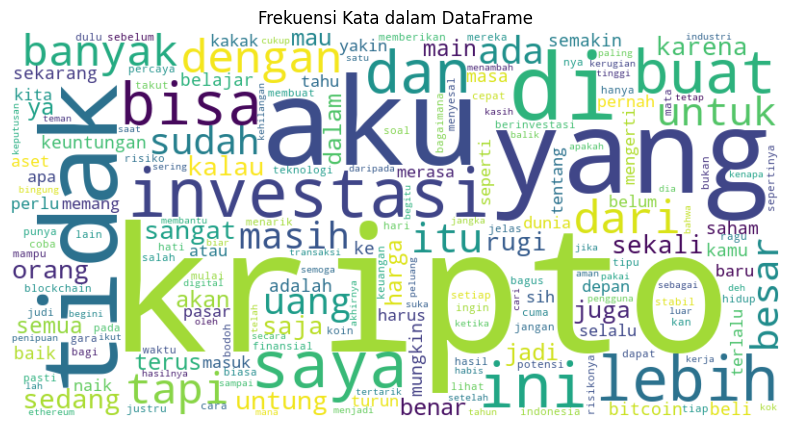

In [23]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Menggabungkan seluruh teks dalam DataFrame
teks = ' '.join(df['normalized_text'].astype(str))

# Membuat list yang berisi setiap kata dalam teks
kata = teks.lower().split()

# Menghitung frekuensi masing-masing kata
frekuensi = dict(Counter(kata))

# Menampilkan hasil
# print("Frekuensi setiap kata dalam DataFrame:")
# for kata, frek in frekuensi.items():
#     print(kata, frek)

# Membuat wordcloud frekuensi kata
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frekuensi)

# Mengatur plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Frekuensi Kata dalam DataFrame')

# Menampilkan plot
plt.show()

# **FREKUENSI KATA DALAM DATAFRAME**
**ini menggunakan wordcloud dan menampilkan kata berdasarkan pembagian kelas.**

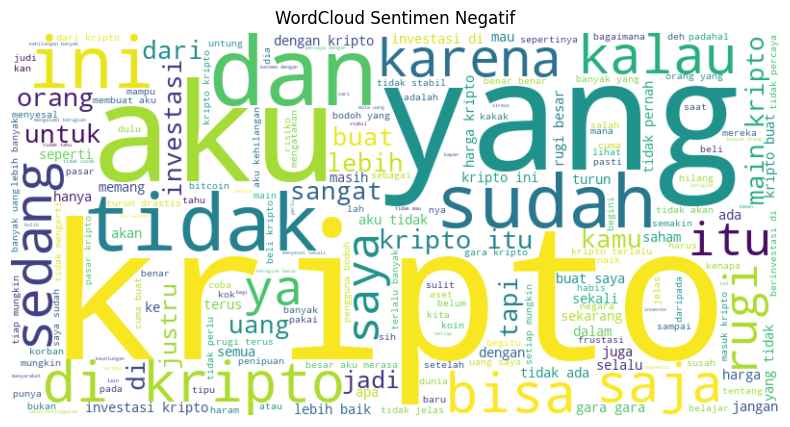

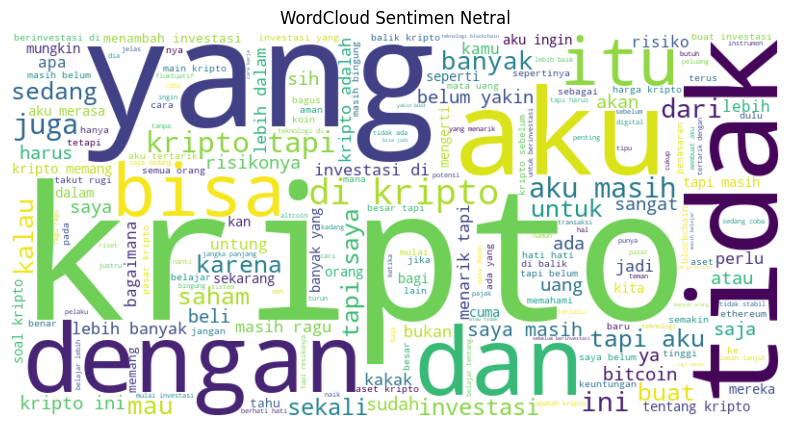

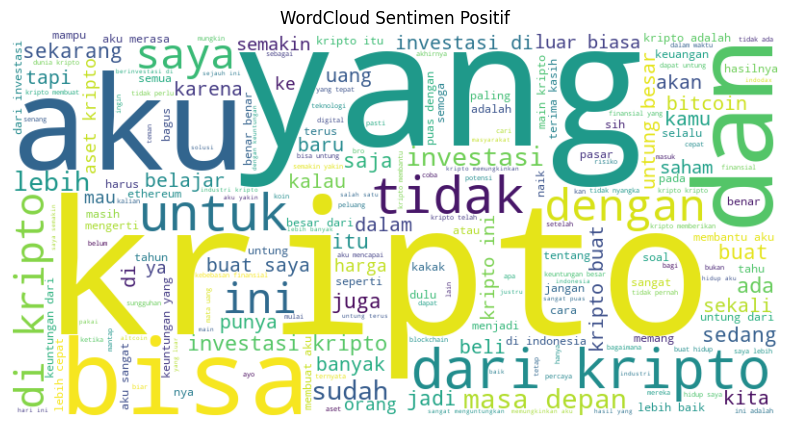

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filter data berdasarkan sentimen
negatif_teks = ' '.join(df[df['kelas'] == 'negatif']['normalized_text'].astype(str))
netral_teks = ' '.join(df[df['kelas'] == 'netral']['normalized_text'].astype(str))
positif_teks = ' '.join(df[df['kelas'] == 'positif']['normalized_text'].astype(str))

# Membuat WordCloud untuk setiap sentimen
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# WordCloud untuk komentar negatif
generate_wordcloud(negatif_teks, 'WordCloud Sentimen Negatif')

# WordCloud untuk komentar netral
generate_wordcloud(netral_teks, 'WordCloud Sentimen Netral')

# WordCloud untuk komentar positif
generate_wordcloud(positif_teks, 'WordCloud Sentimen Positif')


# <span style="color: rgb(86, 156, 214); font-weight: bold;">Menampilkan grafik perubahan jumlah kata mulai dari awal sampai setelah preprocessing</span>

**dilakukan dengan menggunakan matplotlib.pyplot**

Jumlah kata unik pada setiap tahap: [6742, 4452, 4452, 3875]
Jumlah seluruh kata pada setiap tahap: [40843, 39259, 39259, 39510]


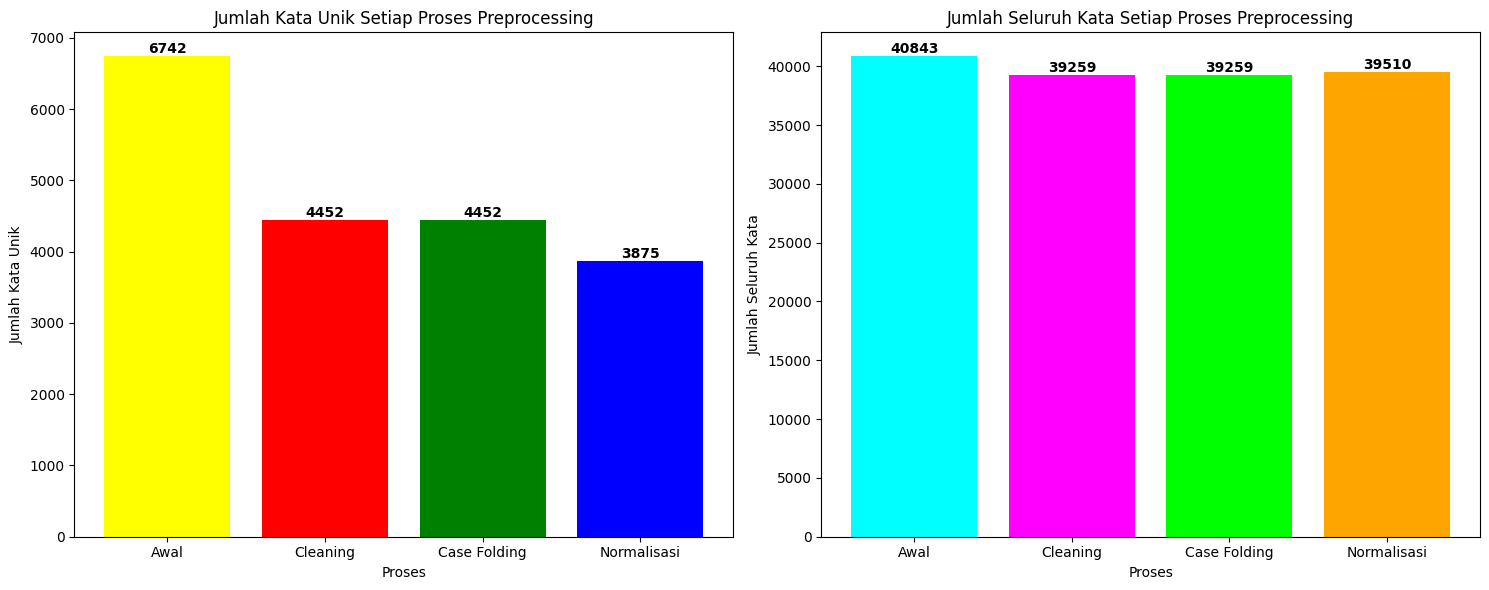

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Asumsi DataFrame df sudah ada dan memiliki kolom:
# 'content', 'text_clean', 'case_folding_text', 'normalized_text'

# Tahapan proses
proses = ['Awal', 'Cleaning', 'Case Folding', 'Normalisasi']

# Variabel untuk menyimpan hasil
data_unique = []  # Menyimpan jumlah kata unik
data_total = []   # Menyimpan jumlah seluruh kata (termasuk yang berulang)

for col in ['content', 'text_clean', 'case_folding_text', 'normalized_text']:
    # Menggabungkan seluruh teks pada kolom menjadi satu string, lalu diubah menjadi list kata
    kata = ' '.join(df[col].astype(str)).lower().split()
    
    # Menghitung frekuensi dengan Counter
    freq = dict(Counter(kata))
    
    # Jumlah kata unik adalah jumlah key dalam freq
    jumlah_kata_unik = len(freq)
    
    # Jumlah seluruh kata adalah panjang list kata yang telah di-split
    jumlah_seluruh_kata = len(kata)
    
    data_unique.append(jumlah_kata_unik)
    data_total.append(jumlah_seluruh_kata)

# Menampilkan data di console
print("Jumlah kata unik pada setiap tahap:", data_unique)
print("Jumlah seluruh kata pada setiap tahap:", data_total)

# Membuat subplots untuk 2 grafik
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot grafik jumlah kata unik
axes[0].bar(proses, data_unique, color=['yellow', 'red', 'green', 'blue'])
axes[0].set_title('Jumlah Kata Unik Setiap Proses Preprocessing')
axes[0].set_xlabel('Proses')
axes[0].set_ylabel('Jumlah Kata Unik')
for i, j in enumerate(data_unique):
    axes[0].text(i, j, str(j), ha='center', va='bottom', fontweight='bold')

# Plot grafik jumlah seluruh kata (termasuk yang berulang)
axes[1].bar(proses, data_total, color=['cyan', 'magenta', 'lime', 'orange'])
axes[1].set_title('Jumlah Seluruh Kata Setiap Proses Preprocessing')
axes[1].set_xlabel('Proses')
axes[1].set_ylabel('Jumlah Seluruh Kata')
for i, j in enumerate(data_total):
    axes[1].text(i, j, str(j), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


# **PEMBOBOTAN KATA 🔡**

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer untuk mengubah teks menjadi fitur
tfidf = TfidfVectorizer()

# Melakukan transformasi TF-IDF pada data latih dan uji
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)

# Menampilkan dimensi hasil TF-IDF
print(f"Dimensi TF-IDF Data Latih: {X_train_tfidf.shape}")
print(f"Dimensi TF-IDF Data Uji: {X_test_tfidf.shape}")


Dimensi TF-IDF Data Latih: (2525, 3678)
Dimensi TF-IDF Data Uji: (280, 3678)


# **TEXT ANALYTICS SUPPORT VECTOR MACHINE - TANPA SMOTE.**

In [28]:
from sklearn.svm import SVC

# Langkah 4: Melatih model SVM dengan kernel linear
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Langkah 5: Prediksi data uji
y_pred = svm_model.predict(X_test_tfidf)

# Menyimpan hasil prediksi ke dalam daftar
results = pd.DataFrame({
    'Fold': fold,
    'Teks Asli': X_test_text,   # Data teks uji asli
    'Label Asli': y_test,  # Label asli
    'Prediksi': y_pred     # Hasil prediksi
})

results.to_csv('hasil_prediksi_svm.csv', index=False, encoding='utf-8')
print("Hasil prediksi berhasil disimpan ke 'hasil_prediksi_svm.csv'.")


Hasil prediksi berhasil disimpan ke 'hasil_prediksi_svm.csv'.


AttributeError: 'ellipsis' object has no attribute 'lower'

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Jumlah seluruh kata setiap proses preprocessing
total_words_per_process = [40843, 39259, 39259, 39510]
max_words = 39510

# Fungsi untuk normalisasi menggunakan jumlah seluruh kata
def normalize_tfidf(tfidf_matrix, total_words, max_words):
    factor = total_words / max_words
    return tfidf_matrix.multiply(factor)

# Inisialisasi TfidfVectorizer
tfidf = TfidfVectorizer()

# Transformasi data latih dan uji dengan TF-IDF
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)

# Normalisasi data TF-IDF
X_train_tfidf_normalized = normalize_tfidf(X_train_tfidf, total_words_per_process[-1], max_words)
X_test_tfidf_normalized = normalize_tfidf(X_test_tfidf, total_words_per_process[-1], max_words)

# Langkah 4: Melatih model SVM dengan kernel linear
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf_normalized, y_train)

# Langkah 5: Prediksi data uji
y_pred = svm_model.predict(X_test_tfidf_normalized)

# Menampilkan hasil evaluasi
print(classification_report(y_test, y_pred))

# Menyimpan hasil prediksi ke dalam file CSV
results = pd.DataFrame({
    'Teks Asli': X_test_text,  # Data teks uji asli
    'Label Asli': y_test,      # Label asli
    'Prediksi': y_pred         # Hasil prediksi
})

results.to_csv('hasil_prediksi_svm.csv', index=False, encoding='utf-8')
print("Hasil prediksi berhasil disimpan ke 'hasil_prediksi_svm.csv'.")


              precision    recall  f1-score   support

     negatif       0.82      0.87      0.84       102
      netral       0.83      0.69      0.75        75
     positif       0.79      0.83      0.81       103

    accuracy                           0.81       280
   macro avg       0.81      0.80      0.80       280
weighted avg       0.81      0.81      0.81       280

Hasil prediksi berhasil disimpan ke 'hasil_prediksi_svm.csv'.


# **EVALUASI MODEL SVM TANPA SMOTE**

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print("===== Data Training ====")
print("negatif : {}".format(sum(y_train=="negatif")))
print("Netral : {}".format(sum(y_train=="netral")))
print("positif : {}".format(sum(y_train=="positif")))
print("===== Data Testing ====")
print("negatif : {}".format(sum(y_test=="negatif")))
print("netral : {}".format(sum(y_test=="netral")))
print("positif : {}".format(sum(y_test=="positif")))
print("===== Total ====")
print("negatif : {}".format(sum(y_test=="negatif")+ sum(y_train=="negatif")))
print("netral : {}".format(sum(y_test=="netral")+ sum(y_train=="netral")))
print("positif : {}".format(sum(y_test=="positif")+ sum(y_train=="positif")))
print("")
kelas = ['negatif', 'netral', 'positif']
print("Akurasi: {:.2f}".format(accuracy_score(y_test, y_pred)))
presisi = precision_score(y_test, y_pred, labels=kelas, average=None)
sensitivitas = recall_score(y_test, y_pred, labels=kelas, average=None)

for i in range(len(kelas)):
    print("Kelas {}: Presisi = {:.2f}, Sensitivitas = {:.2f}".format(kelas[i], presisi[i], sensitivitas[i]))

print("")
print(f"Confution Matrix: \n {confusion_matrix(y_test, y_pred)}")
print("============================================================")

===== Data Training ====
negatif : 891
Netral : 666
positif : 968
===== Data Testing ====
negatif : 102
netral : 75
positif : 103
===== Total ====
negatif : 993
netral : 741
positif : 1071

Akurasi: 0.81
Kelas negatif: Presisi = 0.82, Sensitivitas = 0.87
Kelas netral: Presisi = 0.83, Sensitivitas = 0.69
Kelas positif: Presisi = 0.79, Sensitivitas = 0.83

Confution Matrix: 
 [[89  4  9]
 [ 9 52 14]
 [11  7 85]]
